## Ma'lumotlarni to'plash va qayta ishlash

Ma'lumotlarni to'plash deganda data scienceda analiz uchun kerakli bo'lgan
ma'lumotlarni yig'ishga aytiladi. Odatda analiz uchun tayyor data berilmaydi.
Kerak bo'lgan datani kerakli joydan, websitedan yoki boshqa resurslardan toplash
talab etiladi. Masalan:
    1. Kaggle.com
    2. datasetsearch.com
    3. Web Scraping

Web scraping algoritm yoki dastur yordamida websaytlardan katta hajmdagi ma'lumotlarni yig'ib olishga aytiladi. Aytaylik websaytlardan qandaydir sizga kerak bo'lgan ma'lumotni topdinggiz, python yordamida shu ma'lumotni ajratib olish va kerakli shaklga olib kelish juda ham muhimdir. 

1. Pythonning Beautiful Soup moduli yordamida websaytdan ma'lumotlarni olish
2. Pandas yordamida olingan ma'lumotlarni tozalash va analiz qilish
3. Matplotlib yordamida datani tasvirlash



"http://www.hubertiming.com/results/2017GPTR10K" 

linkidagi datasetni ko'radigan bo'lsak, bu yerda Hillsboroda bo'lib o'tgan 10K kishilik
2017 yildagi poyga natijalari keltirilgan. Bu datani analiz qilish orqali

1. Yuguruvchilarning o'rtacha poygani yakunlash vaqti qancha ekanligi
2. Ayollar va Erkaklar, turli yoshdagilar o'rtasidagi bog'liqliklar 
3. Yuguruvchilarning tugatgan vaqti formal taqsimotga amal qilish qilmasligi


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

    Web scrapingni amalga oshirish uchun quyidagi kutubxonalarni import qilish lozim. Bunda urllib.request moduli URL linklarni ochishga, Beautiful Soup esa datani html filelardan olishga yordam beradi. 
    

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [12]:
url = "http://www.hubertiming.com/results/2017GPTR10K" #kerakli websiteni ochish
#url = "https://kun.uz/"

html = urlopen(url)

In [13]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [14]:
# Get the title
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [15]:
# Website qanday ma'lumotlarni o'z ichiga olgan bo'lsa barchasini chop etadi. 

text = soup.get_text()
print(soup.text)








Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!





















 2017 Intel Great Place to Run 10K \ Urban Clash Games
 Hillsboro Stadium, Hillsboro, OR 
 June 2nd, 2017


                            





 Email
                        timing@hubertiming.com with results questions. Please include your bib number if you have it.


                    






Huber Timing Home





10K:


Finishers:
577


Male:
414


Female:
163









 5K Individual
 5K Team
 10K Individual
 10K Team
 Summary




Indvidual Results



10K Results



Search:

Search
Division:

Men
Women
Non Binary
Masters Men
Masters Women
Masters Non Binary

F 18-25
F 26-35
F 36-45
F 46-55
F Under 18
M 18-25
M 26-35
M 36-45
M 46-55
M 55+
M Under 18
 Team:

Unattached
COLUMBIA TEAM A
COLUMBIA TEAM B
COLUMBIA TEAM C
COLUMBIA TEAM D
COLUMBIA TEAM E
DTNA1
DTNA2
DTNA3
FXG1
INTEL TEAM A
INTEL TEAM B
INTEL TEAM C
INTEL TEAM D
INTEL TEAM E
INTEL TEAM F
INTEL TEAM G
INTEL TEAM H
INTEL TEAM I


bu ma'lumotlarni mishkani o'ng tarafini bosib inspect qismiga bosish orqali ham
ko'rishimiz mumkin.

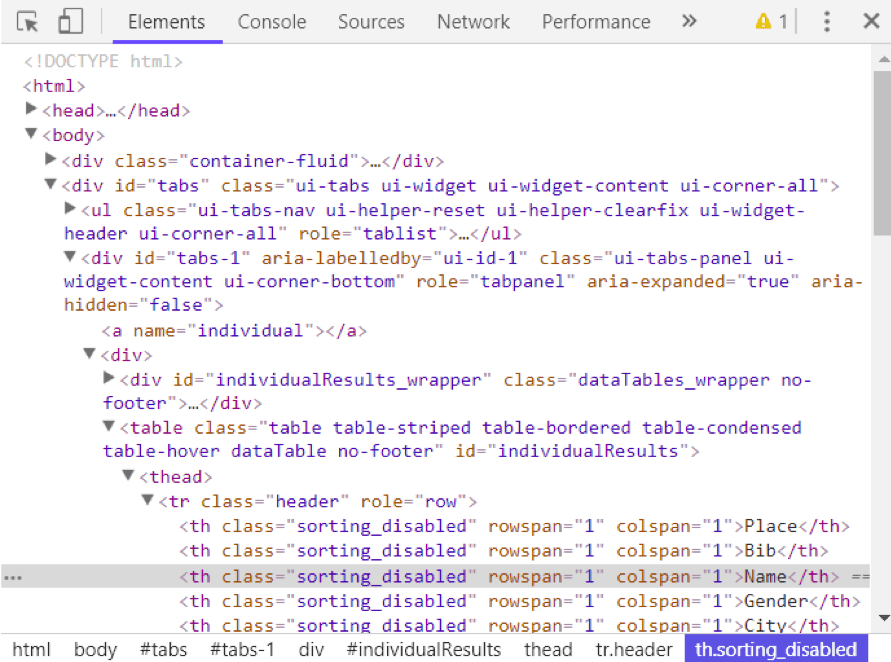

In [10]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

In [16]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [17]:
# datasetdagi jadvallarning qatorlarini chop etish uchun esa quyidagicha
#10 esa boshidagi 10 ta ma'lumot 

rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>Chip Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

                </td>
<td>M</td>
<td>PORTLAND

Maqsadimiz websaytdagi jadvalni olish uni Python yordamida DataFramega o'girish va datani analish qilish. Birinchi barcha qatorlarni listga olish va listni dataframega konvertatsiya qilishimiz lozim.

In [17]:
#for loop jadval qatorlari bo'ylab har bitta qatorga murojaat qiladi va qatorning
#yacheykalarini chop etadi. 

for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

Har bir natija html taglari, belgilari bilan chop etildi. 
Shu sababdan html taglarni o'chirish lozim 
Beautiful Soupda bu uchun maxsus get_text() methodi mavjud

In [18]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()

print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, 1:41:18, 1:42:10, ]


In [19]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, 1:41:18, 1:42:10, ]


str

In [20]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


## Data manipulation and Cleaning

In [21]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7
0,[],None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None
4,[],None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [22]:
df1[0] = df1[0].str.strip('[')
df1.head(10)


,0,1,2,3,4,5,6,7
0,],None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None
4,],None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [23]:
col_labels = soup.find_all('th')

In [24]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, Chip Time, Gun Time, Team]']


In [25]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, Chip Time, Gu..."


In [26]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]


In [27]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None
4,],None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]


In [28]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None


In [29]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    Chip Time  578 non-null    object
 6    Gun Time   578 non-null    object
 7    Team]      578 non-null    object
dtypes: object(8)
memory usage: 41.0+ KB


(583, 8)

In [30]:
df6 = df5.dropna(axis=0, how='any')

In [31]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [32]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [33]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [48]:
df7.to_csv('LastData.csv')

print(df7.to_string())

    Place   Bib                                                                                            Name  Gender                City  Chip Time  Gun Time                                                                            Team
5       1   814                                \r\n\r\n                    JARED WILSON\r\n\r\n                       M              TIGARD      36:21     36:24                                                                                
6       2   573                          \r\n\r\n                    NATHAN A SUSTERSIC\r\n\r\n                       M            PORTLAND      36:42     36:45      \n\r\n                            INTEL TEAM F\r\n                        
7       3   687                              \r\n\r\n                    FRANCISCO MAYA\r\n\r\n                       M            PORTLAND      37:44     37:48                                                                                
8       4   623                     